In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-predictionused-cars/car data.csv


In [2]:
df = pd.read_csv("/kaggle/input/car-price-predictionused-cars/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# EDA

In [6]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

From above we can detect a single car owned by how many members and we found that there is 10 snigle owned cars,1 car is owned by 3 owners and 290 cars have no owner

In [7]:
#Exploring Categorical Features
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

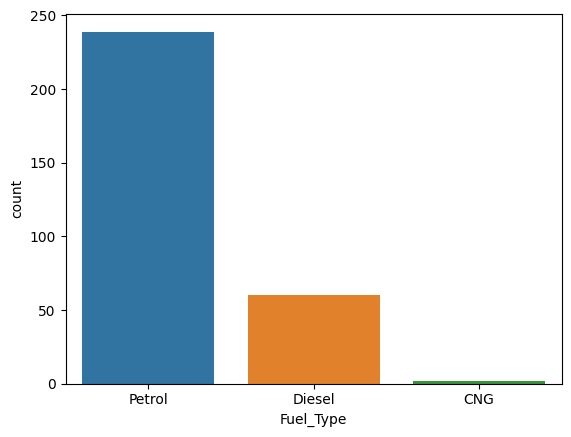

In [9]:
sns.countplot(x='Fuel_Type', data=df)
plt.show()

In [10]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

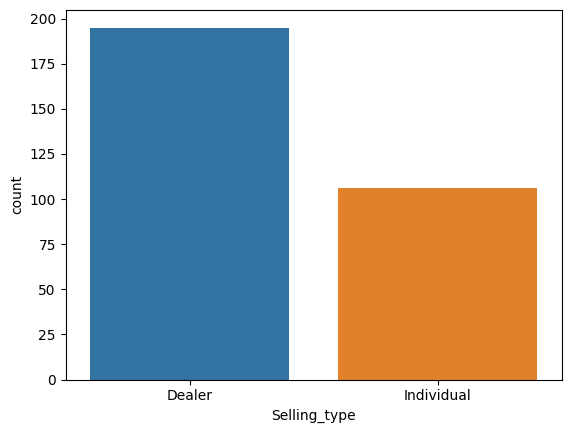

In [11]:
sns.countplot(x='Selling_type', data=df)
plt.show()

In [12]:
df['Transmission'].value_counts()


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

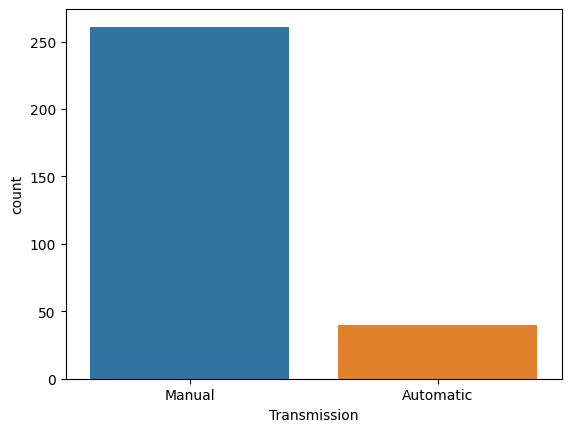

In [13]:
sns.countplot(x='Transmission', data=df)
plt.show()

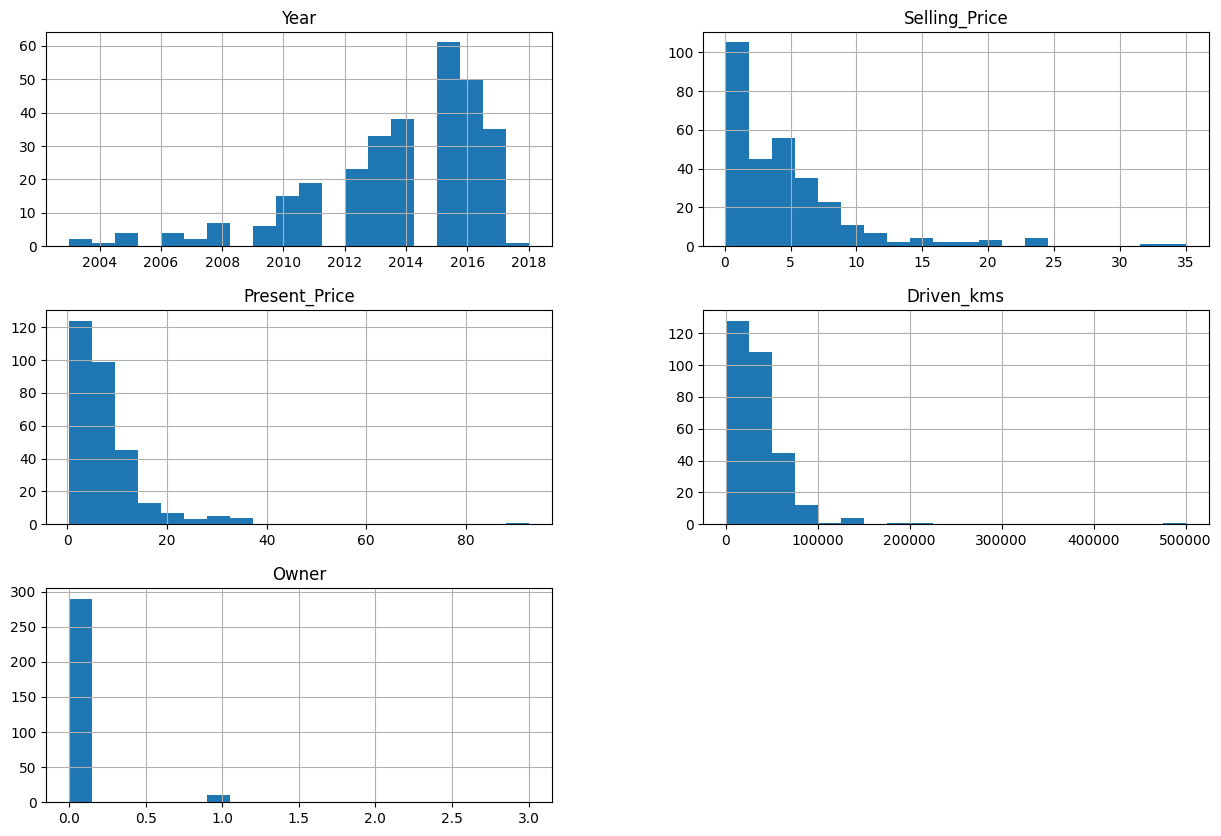

In [14]:
#Exploring Numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()


Simply Histogram of our different numerical features shows us the distribution density

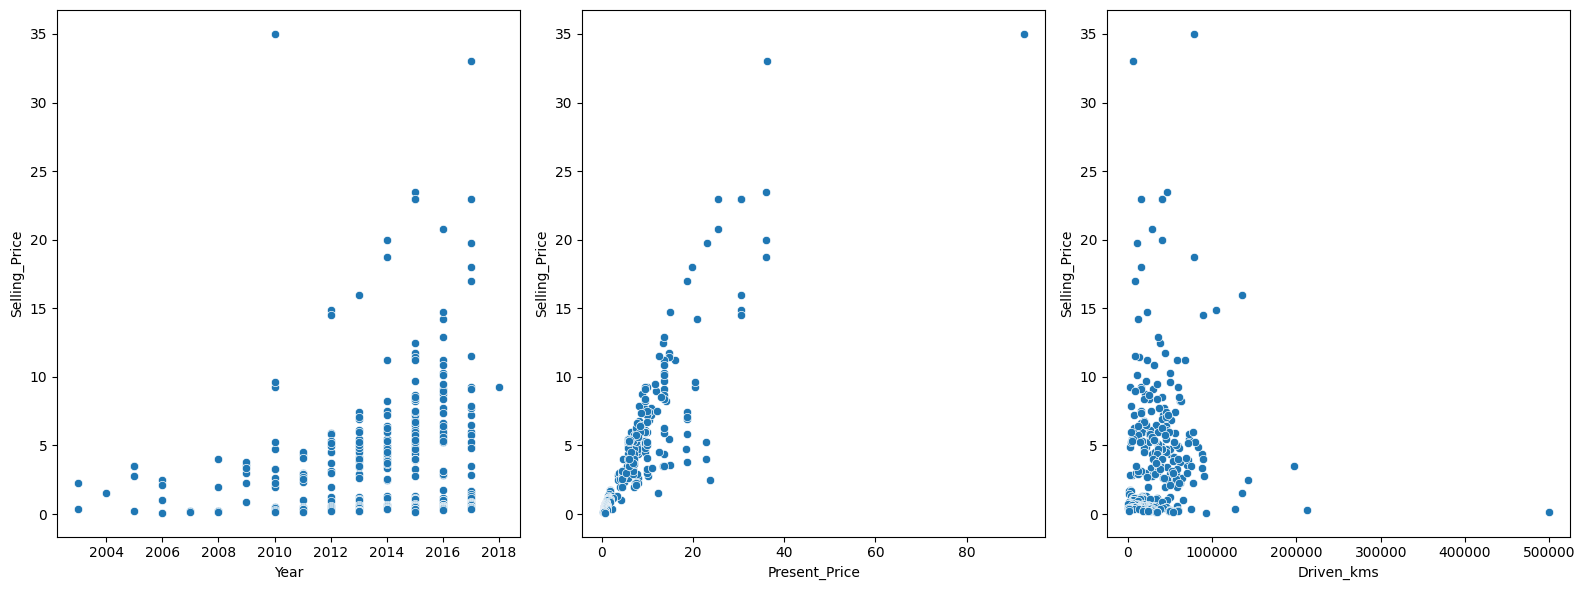

In [15]:
#Finding relationships between different numerical features and our target features
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.tight_layout()
plt.show()

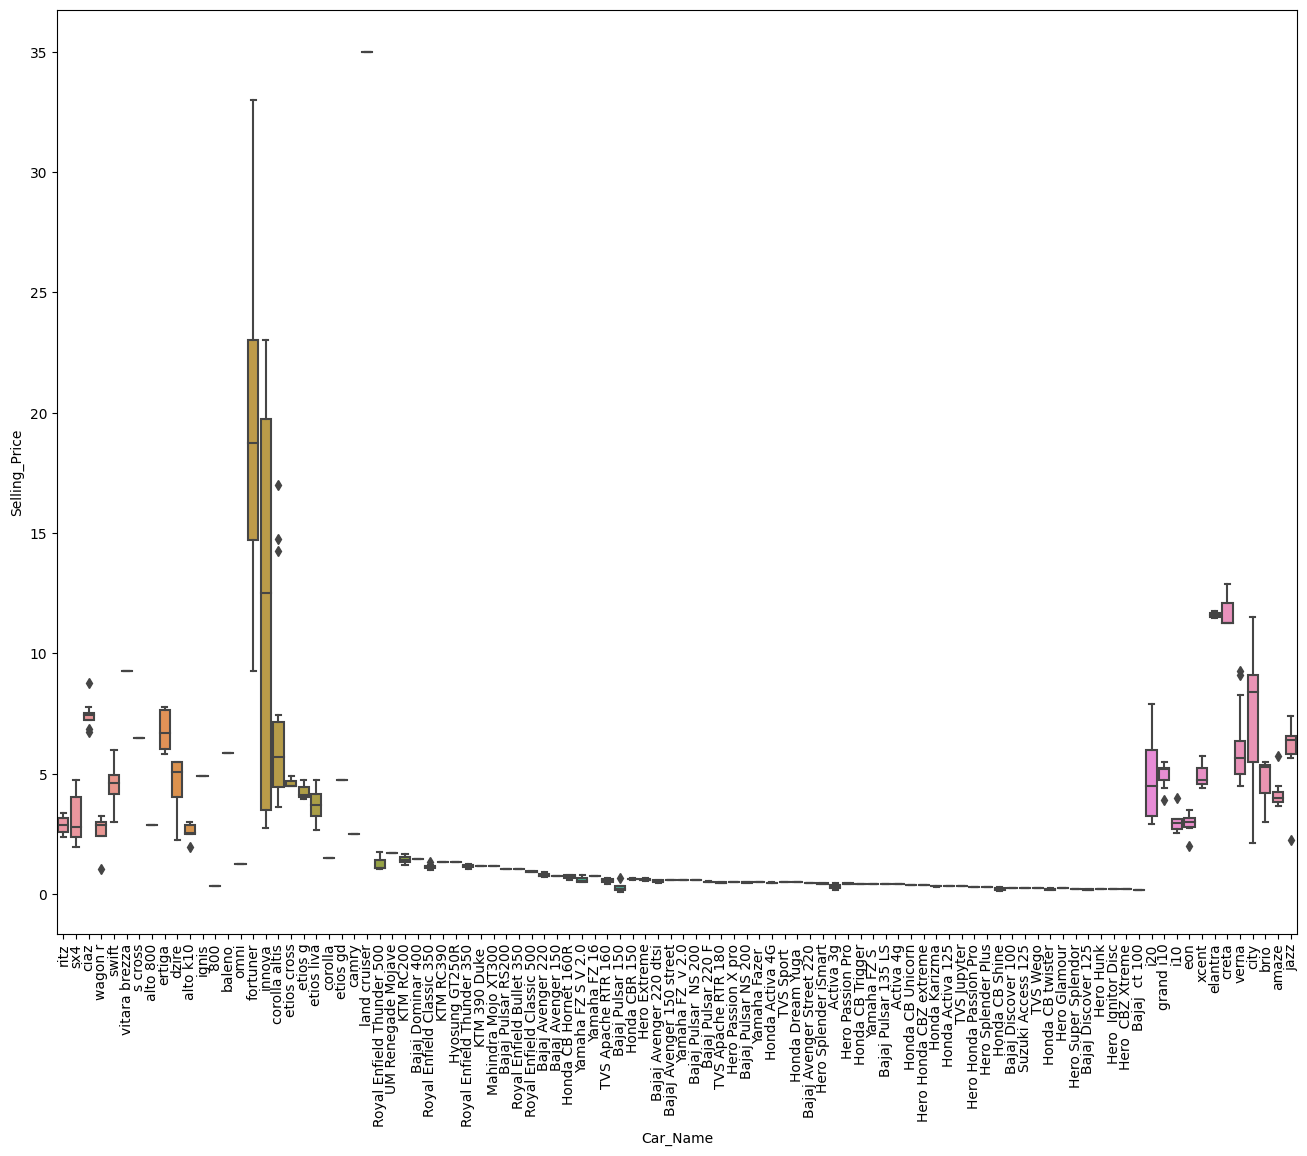

In [16]:
#Finding Relationship between Cars and it's Selling price using BOXPlot
plt.figure(figsize=(16,12))
sns.boxplot(x='Car_Name', y='Selling_Price', data=df)
plt.xticks(rotation=90)  
plt.show()

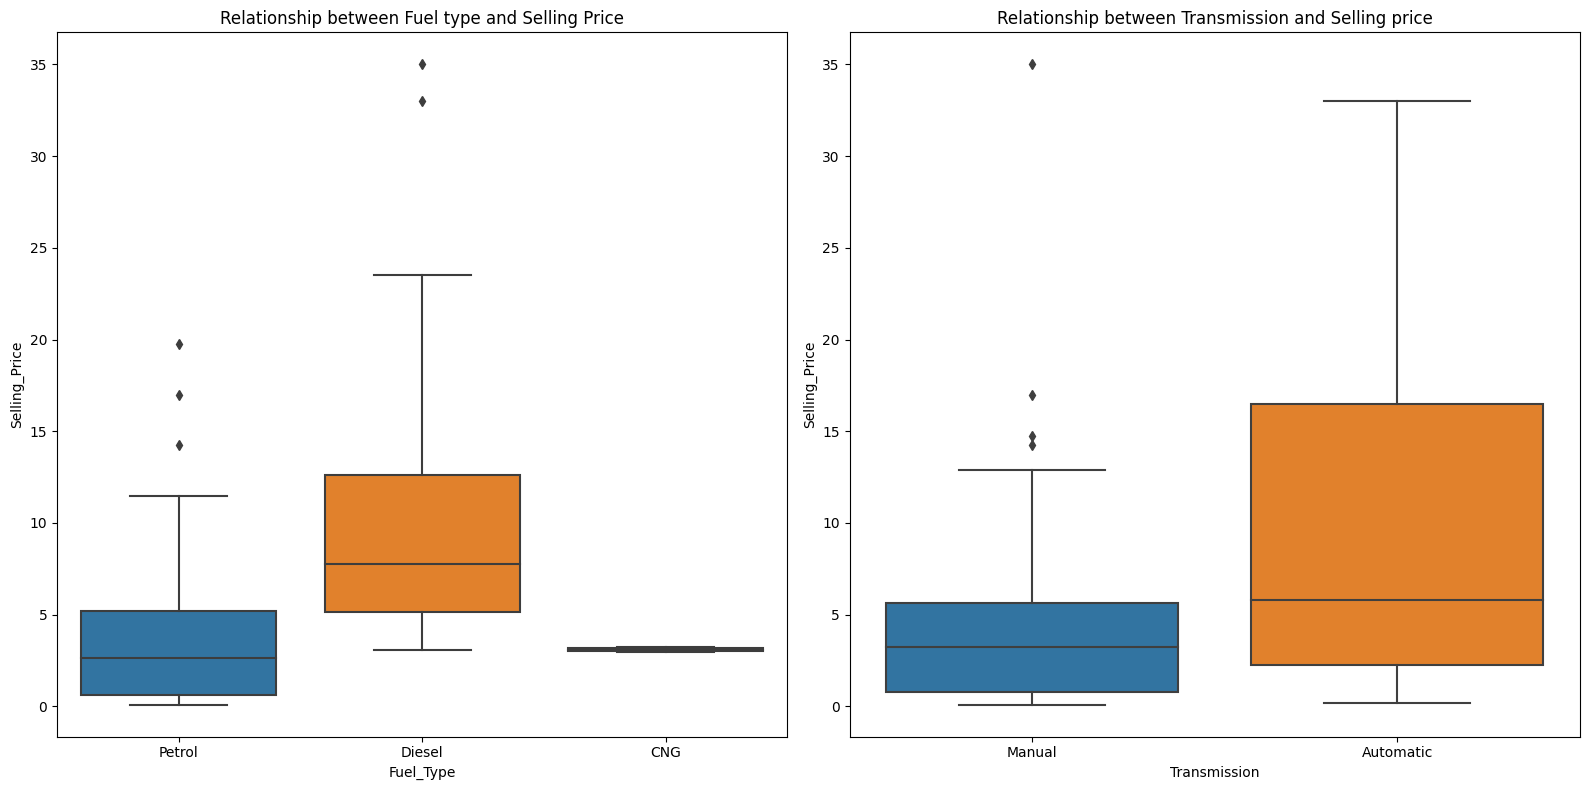

In [17]:

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Relationship between Fuel type and Selling Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Relationship between Transmission and Selling price')
plt.tight_layout()
plt.show()


# Model Building

In [18]:
#Split the datset into features
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [19]:
# One-hot encoding categorical values into numerical values
X_encoded = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission','Car_Name'], prefix=['Fuel', 'Selling', 'Transmission','Cars'])


In [20]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [21]:
#Train a Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_linear = linear_model.predict(X_test)

In [23]:
#Evaluating the Regression Model
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = sqrt(mse_linear)
print(f'Linear Regression RMSE: {rmse_linear}')

Linear Regression RMSE: 1.5125556296303482


In [24]:
#Train a Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred_rf = rf_model.predict(X_test)

In [26]:
#Evaluating the Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 0.8724393833985933


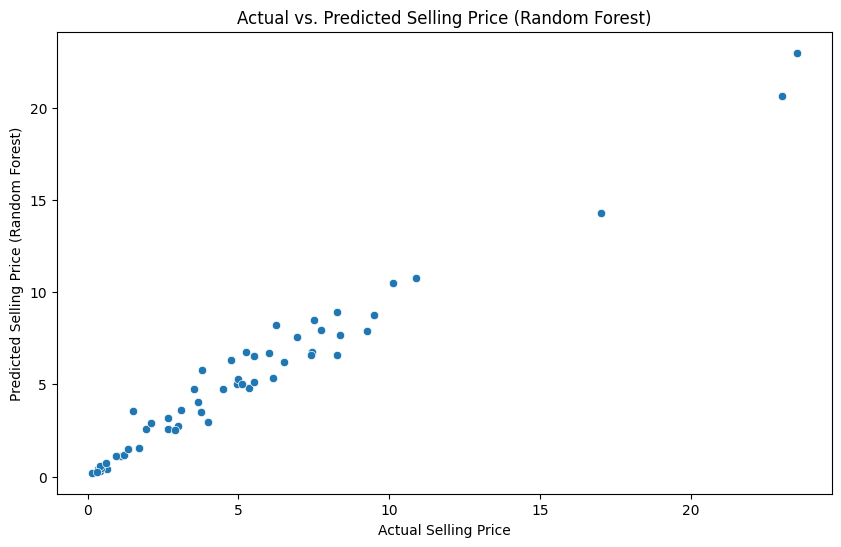

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Random Forest)')
plt.title('Actual vs. Predicted Selling Price (Random Forest)')
plt.show()

As wev can see from above scatter plot that datapoints are close to eachother we can say that our model works well.